In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
pip install pycaret

     |████████████████████████████████| 249 kB 396 kB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 6.2 MB/s eta 0:00:01    |███████▋                        | 3.4 MB 3.9 MB/s eta 0:00:03     |████████                        | 3.5 MB 3.9 MB/s eta 0:00:03
     |████████████████████████████████| 98 kB 3.2 MB/s eta 0:00:011


     |████████████████████████████████| 339 kB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 77 kB 3.2 MB/s eta 0:00:011
     |████████████████████████████████| 85 kB 2.2 MB/s eta 0:00:011
     |████████████████████████████████| 125 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 1.7 MB/s  eta 0:00:01


     |████████████████████████████████| 2.1 MB 8.7 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=22a4637814046aa28bc840b0afd830ea67f1a55c2f73daf463e8030e136082c1
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.14.1-py3-none-any.whl size=100577 sha256=532769f57f111fc7332827b9cabed91d8f83cb698a318597f7062fc7b2f5ad3b
  Stored in directory: /root/.cache/pip/wheels/7f/d9/25/baefac3eda0e7dbf143008d2b9865e0d923d4b7306136244fe
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.1-py3-none-any.whl size=17158 sha256=6a3bacb98f5a81a4549f50b19d80c794fe8b61f12965fa698901fc1b622be2fc
  Stored in directory: /root/.cache/pip/wheels/c4/b6/b5/e76659f3b2a3a226565e27f0a7eb7a3ac93c3f4d68acfbe617
  Created wheel for pyod: filename=pyod-0.8.6-py3-none-any.whl size=112145 sha256=13baaeff7514100

In [4]:
import pycaret

In [5]:
df = pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
from pycaret.regression import *
exp_reg101 = setup(data = df, target = 'Class', session_id=123)

,Description,Value
0,session_id,123
1,Target,Class
2,Original Data,"(284807, 31)"
3,Missing Values,False
4,Numeric Features,30
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(199364, 30)"


In [7]:
model_et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0009,0.0004,0.0204,0.7689,-0.0000,0.2631
1,0.0009,0.0003,0.0182,0.7722,-0.0000,0.1921
2,0.0009,0.0003,0.0171,0.8372,-0.0000,0.1908
3,0.0012,0.0006,0.0235,0.7482,-0.0000,0.3150
4,0.0009,0.0003,0.0180,0.7772,-0.0000,0.2231
5,0.0010,0.0005,0.0218,0.6944,-0.0000,0.2852
6,0.0010,0.0005,0.0220,0.7519,-0.0000,0.2859
7,0.0010,0.0003,0.0182,0.7877,-0.0000,0.2713
8,0.0011,0.0005,0.0222,0.7016,-0.0000,0.2648
9,0.0008,0.0003,0.0172,0.7549,-0.0000,0.2458


In [8]:
predict_model(model_et) #predicts model on test set (30%)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0010,0.0004,0.0201,0.7831,0.0142,0.2398


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label
0,54992.0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,...,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,50.000000,0,0.0
1,145983.0,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,...,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,58.000000,0,0.0
2,142073.0,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,...,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,198.000000,0,0.0
3,132462.0,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,...,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,82.000000,0,0.0
4,119001.0,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,...,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,93.750000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,51321.0,0.981634,-0.013797,0.702670,1.179459,0.141590,1.295216,-0.350124,0.487122,0.426048,...,0.008747,0.192576,-0.639571,0.165878,-0.418655,0.110630,0.016445,9.650000,0,0.0
85439,86500.0,-0.188338,0.753188,0.535544,-0.242559,0.103888,-0.044430,0.423675,0.077219,0.369646,...,1.167204,-0.185061,-0.401266,-0.765920,-0.238929,0.166404,0.236026,43.740002,0,0.0
85440,36351.0,-0.959696,0.736918,1.722280,0.265029,0.769584,-0.443858,0.885135,-0.035855,-0.407058,...,-0.200209,-0.376018,-0.108290,0.847200,-0.397175,0.026365,0.062753,22.889999,0,0.0
85441,34964.0,1.293597,-0.527259,0.659631,-0.775476,-0.962009,-0.355633,-0.699761,0.061105,-1.084533,...,-0.111126,0.167429,0.206325,0.109294,-0.481575,0.024369,0.012776,15.000000,0,0.0


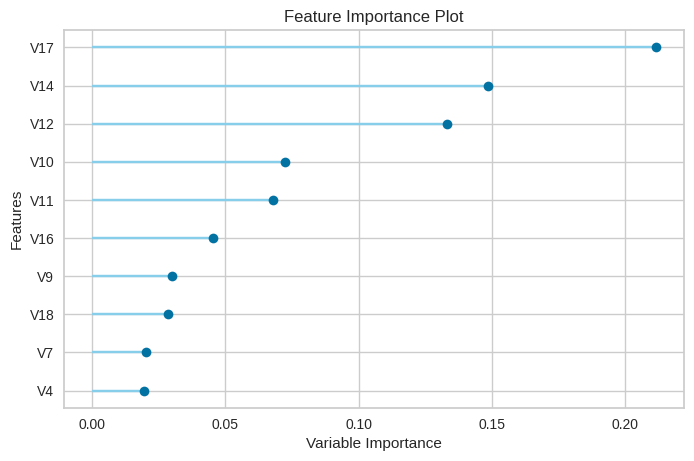

In [9]:
plot_model(model_et, plot = 'feature') # important variables or features for model accuracy

In [12]:
evaluate_model(model_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

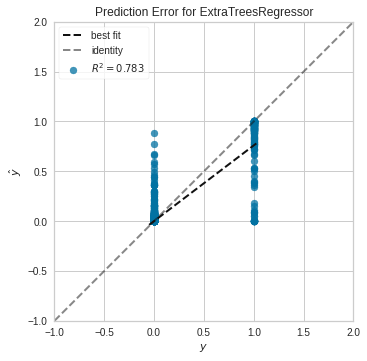

In [10]:
plot_model(model_et, plot = 'error')